<a href="https://colab.research.google.com/github/oussemajelassi/embedded_ReinforcementLearning/blob/main/RL_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!python -m pip install gymnasium==0.28.1
!python -m pip install stable-baselines3[extra]==2.0.0.a1

  Using cached gymnasium-0.28.1-py3-none-any.whl (925 kB)
  Using cached jax_jumpy-1.0.0-py3-none-any.whl (20 kB)
  Using cached Farama_Notifications-0.0.4-py3-none-any.whl (2.5 kB)
  Using cached stable_baselines3-2.0.0a1-py3-none-any.whl (176 kB)
  Using cached Shimmy-0.2.1-py3-none-any.whl (25 kB)
  Using cached AutoROM-0.6.1-py3-none-any.whl (9.4 kB)
  Using cached AutoROM.accept-rom-license-0.6.1.tar.gz (434 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 16.5 MB/s eta 0:00:00
  Created wheel for AutoROM.accept-rom-license: filename=AutoROM.accept_rom_license-0.6.1-py3-none-any.whl size=446660 sha256=ef2d36842c68be80abedf69294a74c613bd909c384a115d1997e191a9a0acd92
  Stored in directory: /root/.cache/pip/wheels/6b/1b/ef/a43ff1a2f1736d5711faa1ba4c1f61be1131b8899e6a057811
Successfully built AutoROM.accept-rom-license


In [3]:
import gymnasium as gim
import stable_baselines3 as sb3
import matplotlib.pyplot as plt
import cv2 as cv


In [5]:
Env = gim.make('CartPole-v1', render_mode ='rgb_array')

In [7]:
obs,info = Env.reset()
print(obs)
print(info)

[ 0.02135336 -0.0417211  -0.03774399  0.01714394]
{}


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


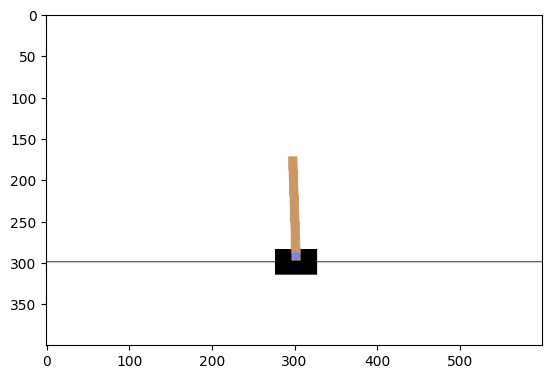

In [8]:
# Visualize the envrieonment fir the first time
Frame = Env.render()
plt.imshow(Frame)

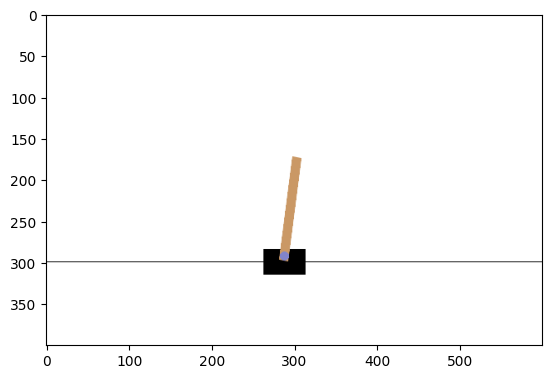

In [16]:
# Now it is time to take some actions
obs, reward, terminated, truncated, info = Env.step(action = 0)
Frame = Env.render()
plt.imshow(Frame)

In [26]:
# A function implementing a model prediction in our env

def RLModelinference ( env , model , video ) :
  obs, info = env.reset()
  RL_Reward = 0
  RL_length = 0
  while True :
    action , _ = model.predict(obs)
    obs, reward, terminated, truncated, info = env.step(action)
    RL_Reward += reward
    RL_length += 1
    if ( video ) :
      Frame = env.render()
      Frame = cv.cvtColor(Frame, cv.COLOR_RGB2BGR)
      video.write(Frame)
    if ( terminated or truncated ) :
      return RL_Reward , RL_length


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
# Our Demo Model , will return random values

class FlookiModel () :
  def __init__ (self , env) :
    self.env = env
  def predict(self , obs) :
    return self.env.action_space.sample() , info

In [30]:
# Capturing a video for a sequence of steps in the environment
FPS = 30
size = (Frame.shape[1] , Frame.shape[0] )
EnvironmentVideo = cv.VideoWriter("sequence.mp4",cv.VideoWriter_fourcc('m','p','4','v'), FPS, size)
FlookiTestModel = FlookiModel (Env)
for counter in range (10) :
   RL_Reward , RL_length = RLModelinference(Env , FlookiTestModel , EnvironmentVideo )

EnvironmentVideo.release()
